# Downloading data base

This notebook is created to access the 2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE, which can be found here: https://github.com/CSSEGISandData/COVID-19

Written by Bruno Abreu, April 2020
as part of the Racionalidade Cientifica initiative.

In [1]:
import sys
import os
import pandas as pd

In [2]:
global repo_path
repo_path = "/home/babreu/Science/covid19/repo"

In [3]:
def update_repo():
    """
    This should clone the data base to your working directory. Make sure to correct the file path, as well as 
    make sure to run this function before doing analysis so that you get all of the available data.
    """
    pull = "git pull https://github.com/CSSEGISandData/COVID-19.git"
    os.chdir(repo_path) 
    os.system(pull)



# Reading files: temporal series

In [4]:
def read_files_ts():
    """
    Function to read the CSV files with temporal series and place them into pandas dataframes. 
    It will return 3 data frames.
    """
    update_repo()
    
    file = repo_path + "/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv" 
    df_cases = pd.read_csv(file)
    
    file = repo_path + "/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv" 
    df_deaths = pd.read_csv(file)
    
    file = repo_path + "/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv" 
    df_recovs = pd.read_csv(file)
    
    return df_cases, df_deaths, df_recovs

In [5]:
df_c,df_d,df_r = read_files_ts()

In [6]:
df_c.sample(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20
179,NaN,Papua New Guinea,-6.315000,143.955500,0,0,0,0,0,0,...,1,1,1,1,2,2,2,2,2,2
19,NaN,Bahrain,26.027500,50.550000,0,0,0,0,0,0,...,643,672,688,700,756,811,823,887,925,1040
235,NaN,Syria,34.802075,38.996815,0,0,0,0,0,0,...,16,16,16,19,19,19,19,19,19,25
48,NaN,Chile,-35.675100,-71.543000,0,0,0,0,0,0,...,3404,3737,4161,4471,4815,5116,5546,5972,6501,6927
15,Western Australia,Australia,-31.950500,115.860500,0,0,0,0,0,0,...,400,400,436,453,460,460,481,495,506,514


## Cleaning data

In [7]:
from datetime import datetime      #having a nicer index format so graphs look cool

In [8]:
df_c = df_c.T                     #using transpose of data frame

df_c.fillna('',inplace=True)      #droping NaNs
 
x1 = []                            #putting together state and country                        
for i in range(df_c.shape[1]):
    if df_c.iloc[0][i] == '':
        y = df_c.iloc[1][i]
    else:
        y = df_c.iloc[0][i] + ', ' + df_c.iloc[1][i]
    x1.append(y)
    
df_c.columns = x1

df_c.drop(index=['Province/State','Country/Region','Lat', 'Long'],inplace=True)       #droping geography, keeping only dates
  

x2 = []                             #turning index into datetime format
for i in range(len(df_c.index)):
    y = df_c.index[i]
    z = datetime.strptime(y, '%m/%d/%y')
    x2.append(z)

df_c.index = x2

In [9]:
df_d = df_d.T
df_d.fillna('',inplace=True) 
x1 = []                     
for i in range(df_d.shape[1]):
    if df_d.iloc[0][i] == '':
        y = df_d.iloc[1][i]
    else:
        y = df_d.iloc[0][i] + ', ' + df_d.iloc[1][i]
    x1.append(y)
df_d.columns = x1
df_d.drop(index=['Province/State','Country/Region','Lat', 'Long'],inplace=True)
x2 = []
for i in range(len(df_d.index)):
    y = df_d.index[i]
    z = datetime.strptime(y, '%m/%d/%y')
    x2.append(z)
df_d.index = x2

In [10]:
df_r = df_r.T
df_r.fillna('',inplace=True) 
x1 = []                     
for i in range(df_r.shape[1]):
    if df_r.iloc[0][i] == '':
        y = df_r.iloc[1][i]
    else:
        y = df_r.iloc[0][i] + ', ' + df_r.iloc[1][i]
    x1.append(y)
df_r.columns = x1
df_r.drop(index=['Province/State','Country/Region','Lat', 'Long'],inplace=True)
x2 = []
for i in range(len(df_r.index)):
    y = df_r.index[i]
    z = datetime.strptime(y, '%m/%d/%y')
    x2.append(z)
df_r.index = x2

Now we have a way to look at specific countries/regions:

In [11]:
df_d['Brazil'].sample(5)

2020-02-29    0
2020-01-31    0
2020-02-26    0
2020-02-15    0
2020-02-07    0
Name: Brazil, dtype: object

### Separating by country, viz. disregarding regions --- TO DO

For local analysis it could be important to have data split into province/state, but for a global analysis that doesn't matter much. Plus, some countries are still not releasing that much granular data. So we could group these.

## Framing BRAZIL

In [12]:
brazil = pd.DataFrame(index=df_c.index)
brazil['Cases'] = df_c['Brazil']
brazil['Deaths'] = df_d['Brazil']
brazil['Recovered'] = df_r['Brazil']

In [13]:
brazil.sample(3)

,Cases,Deaths,Recovered
2020-02-10,0,0,0
2020-03-25,2554,59,2
2020-03-27,3417,92,6


# Plotting

In [14]:
import matplotlib.pyplot as plt 
plt.show()

Text(0, 0.5, 'Number of cases')

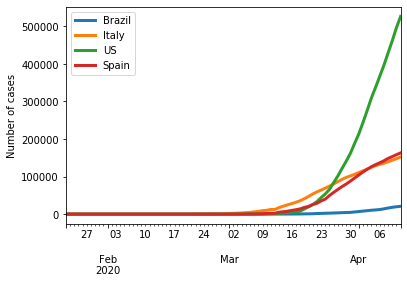

In [15]:
df_c[['Brazil','Italy', 'US','Spain']].plot(linewidth=3)
plt.ylabel('Number of cases') 

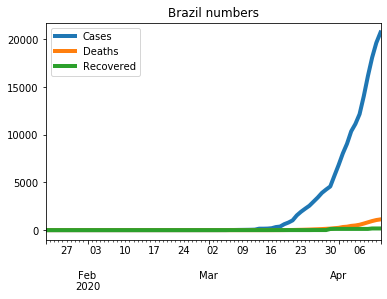

In [16]:
brazil.plot(kind='line',linewidth=4,title='Brazil numbers')

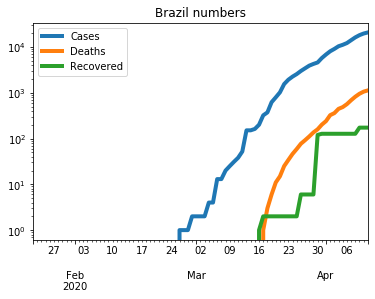

In [17]:
brazil.plot(kind='line',linewidth=4,logy=True,title='Brazil numbers')

# Reading files: daily data

In [18]:
def fix_countries_names(countries):
    """
    Yes, the name says it all
    """
    fixed_list = []
    for country in countries:
        fixed_name = country.replace('Mainland ', '').replace('United Kingdom', 'UK')
        fixed_name = fixed_name.replace(' Azerbaijan', 'Azerbaijan').replace('Viet Nam', 'Vietnam')
        fixed_list.append(fixed_name)
    return fixed_list

In [19]:
def read_files_dd():
    """
    This function will read the daily reports files and return a double-indexed dataframe with the external
    layer representing the Country and the internal layer representing the date.
    """
    update_repo()

    # path to folder
    dd_path = repo_path + "/csse_covid_19_data/csse_covid_19_daily_reports"
    os.chdir(dd_path)
    filelist = os.listdir()

    # create list of files and timestamps
    ind2 = []
    for file in filelist:
        if file[-3:] == 'csv':
            date = datetime.strptime(file.strip('.csv'), '%m-%d-%Y')
            ind2.append(date)
    ind2.sort()

    #remove unecessary files
    filelist.remove('README.md')
    filelist.remove('.gitignore')
    filelist.sort()

    # now we need to find all possible countries in these files
    # unfortunately this has been done in a non-consistent way by JHU
    names_for_countries = set()
    for file in filelist:
        df_temp = pd.read_csv(file)
        cols = []
        for col in list(df_temp.columns):
            cols.append(col.replace('/','_'))
        df_temp.columns = cols
        names_for_countries.update(list(df_temp['Country_Region']))
    names_for_countries = list(names_for_countries)
    fixed_names = fix_countries_names(names_for_countries)
    unique_countries = set(fixed_names)
    countries = list(unique_countries)
    countries.sort()
    ind1 = countries

    #double index with product country*date
    iterables = [ind1,ind2]
    double_ind = pd.MultiIndex.from_product(iterables, names=['Country','Date'])

    # create double indexed dataframe filled with zeros
    df_dd = pd.DataFrame(index=double_ind,columns=['Confirmed','Deaths','Recovered']).fillna(0)

    # read files and update dataframe
    for counter,file in enumerate(filelist):
        df_temp = pd.read_csv(file)
        cols = []
        for col in list(df_temp.columns):
            cols.append(col.replace('/','_'))
        df_temp.columns = cols
        countries = list(df_temp['Country_Region'])
        countries = fix_countries_names(countries)
        df_temp['Country_Region'] = countries
        df_temp = df_temp.groupby(['Country_Region']).sum() 
        x = [list(df_temp.index),[ind2[counter]]]
        tr = pd.MultiIndex.from_product(x)
        df_temp.index = tr
        df_dd.loc[df_temp.index] = df_temp[['Confirmed','Deaths','Recovered']]
        
    return df_dd

Now we have a huge table with a double index: (Country, Date). This should be all we need.

In [20]:
df = read_files_dd()
df.sample(10)

,,Confirmed,Deaths,Recovered
Country,Date,,,
Laos,2020-04-02,10.0,0.0,0.0
Dominican Republic,2020-02-29,0.0,0.0,0.0
Bhutan,2020-02-03,0.0,0.0,0.0
Canada,2020-03-05,37.0,0.0,6.0
Holy See,2020-02-26,0.0,0.0,0.0
Finland,2020-03-30,1352.0,13.0,10.0
Namibia,2020-03-26,8.0,0.0,2.0
St. Martin,2020-01-23,0.0,0.0,0.0
South Africa,2020-02-13,0.0,0.0,0.0


# Plotting

With this, we can access date on each level of the index. For example, for a specific country:

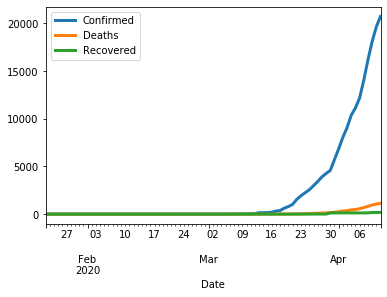

In [21]:
df.xs('Brazil',level='Country')[['Confirmed','Deaths','Recovered']].plot(linewidth=3)

Or for a specific date:

In [22]:
x = pd.Timestamp(year=2020,month=4,day=8)

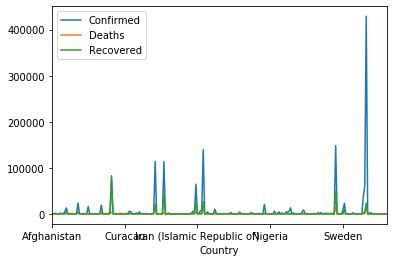

In [23]:
df.xs(x,level='Date').plot()

Here it is obvious that a geographical map would be ideal.

# Geographical data

## Finding coordinates

This may look stupid because I literally dropped coordinates on cleaning the data above. But if you look deeper in the files, you'll see that coordinates started to show up in the middle of the process. Add that to the fact that names of countries are not consistent and, there will go, a mess. The names have already been fixed in function fix_countries_names just a few cells bellow. Now we'll create a dictionary where the keys are the countries and the values are associated latitudes and longitudes.

In [24]:
from geopy.geocoders import Nominatim    # will find coordinates
import numpy as np                       # gives us good NaNs

In [25]:
def geolocate(country = None):
    """
    Returns lat/long coordinates of input country.
    """
    geolocator = Nominatim()
    try:
        loc = geolocator.geocode(country, timeout=5)
        return loc.latitude, loc.longitude
    except:
        return np.nan, np.nan

In [26]:
# create a list with all countries on record and an associated dictionary with the coordinates
# so we don't have to do that slow search every time
countries = list(set(list(df.index.get_level_values(0))))
countries.sort()
lats = []
longs = []
for country in countries:    # get coordinates
    lat,long = geolocate(country)
    lats.append(lat)
    longs.append(long)
# create dictionary
latitudes = dict(zip(countries,lats))
longitudes = dict(zip(countries,longs))

/home/babreu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  """


## Static maps

In [27]:
import descartes                   # not sure exactly where I used this, but it doesn't hurt 
import geopandas as gpd            # library for geographical data
from shapely.geometry import Point, Polygon # adds shapes to dataframe

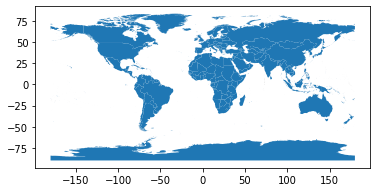

In [28]:
# import and plot world map 
# .shp files are maps. Google about it and find one that you like.
wmap = gpd.read_file('/home/babreu/Science/covid19/world_borders/TM_WORLD_BORDERS-0.3.shp')
wmap.plot()

In [29]:
x = pd.Timestamp(year=2020,month=4,day=8)   # pick a date
tr = pd.DataFrame(df.xs(x,level='Date'))                  # slice dataframe for that date
countries = list(tr.index)                  # extract countries

# find coordinates
lats = [latitudes[country] for country in countries]
longs = [longitudes[country] for country in countries]

# incorporate it to sliced dataframe
tr['Latitude'] = lats
tr['Longitude'] = longs

# create geo data frame with points in position
geometry = [Point(xy) for xy in zip(tr['Longitude'], tr['Latitude'])]    # geometry of frame

crs = {'init': 'epsg:4326'}     # this is the coordinates type
geo_df = gpd.GeoDataFrame(tr, crs = crs, geometry = geometry)   # data frame

geo_df.head()

,Confirmed,Deaths,Recovered,Latitude,Longitude,geometry
Country,,,,,,
Afghanistan,444.0,14.0,29.0,33.768006,66.238514,POINT (66.23851 33.76801)
Albania,400.0,22.0,154.0,41.000028,19.999962,POINT (19.99996 41.00003)
Algeria,1572.0,205.0,237.0,28.000027,2.999983,POINT (2.99998 28.00003)
Andorra,564.0,23.0,52.0,42.540717,1.573203,POINT (1.57320 42.54072)
Angola,19.0,2.0,2.0,-11.877577,17.569124,POINT (17.56912 -11.87758)


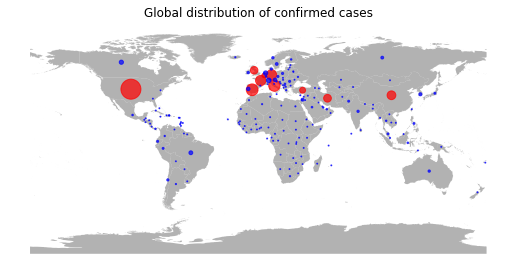

In [30]:
# organize data frame by number of confirmed cases
geo_df.sort_values(by=['Confirmed'],ascending=False,inplace=True)

# define marker sizes
max_cases = geo_df.iloc[0].Confirmed
markersize = []
for country in list(geo_df.index):
    cases = geo_df.loc[country].Confirmed
    if cases > 1000:
        size = 400*cases / max_cases    # 400 is purely empirical
    elif cases >= 1:
        size = 1
    else:
        size = 0
    markersize.append(size)
        
# define marker color: 10 countries with most cases will be red
markercolor = geo_df.shape[0]*['blue']
markercolor[0:9] = 10*['red']

# plot 
fig, ax = plt.subplots(figsize=(9,5))
wmap.plot(ax = ax, alpha=0.6, color='grey')
ax.axis('off')
ax.set_title('Global distribution of confirmed cases')
geo_df.plot(ax=ax,markersize=markersize,edgecolor=markercolor,color=markercolor,alpha=0.7)

## Create interactive map

In [31]:
import folium

In [32]:
folium_map = folium.Map(location=[0, 0], zoom_start=2,tiles="CartoDB dark_matter",title='Here')   # creates map

max_cases = tr['Confirmed'].max()
total_cases = tr['Confirmed'].sum()

for country in list(tr.index):
    cases = tr.loc[country]['Confirmed']
    if cases > 1000:         # neglect countries with less than 1000 cases confirmed
        radius = 40*(cases / max_cases)
    elif cases > 0:
        radius = 0.1
    else:
        continue
    color="#0A8A9F" # teal 
    lat = tr.loc[country]['Latitude']
    long = tr.loc[country]['Longitude']
    if np.isnan(lat) or np.isnan(long):
        # do nothing!
        print("- ", country, " has no coordinates available")
    else:
        popup_text = """Confirmed cases in {}: {} ({}%)"""
        popup_text = popup_text.format(country, int(tr.loc[country]['Confirmed']), "{:.2f}".format(100*cases/total_cases))
            
        folium.CircleMarker(location=(lat,long), radius=radius, color=color, fill=True, popup=popup_text).add_to(folium_map)
            
folium_map

# Making videos

Here we will plot on maps the evolution of the pandemic.

In [33]:
import matplotlib
import matplotlib.animation as animation
from datetime import timedelta

In [34]:
#initialize writer ffmpeg recording 20fps with bitrate 1800
# I needed to conda install -c conda-forge ffmpeg
Writer = animation.FFMpegWriter(fps=20, metadata=dict(artist='Bruno'), bitrate=1800)

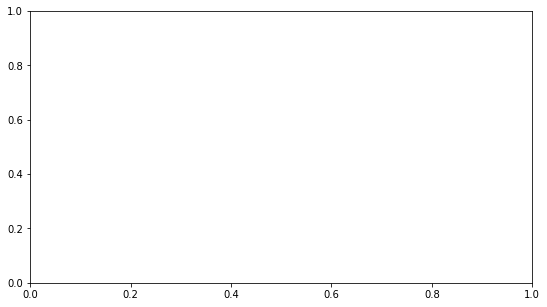

In [35]:
#initialize writer ffmpeg recording 20fps with bitrate 1800
# I needed to conda install -c conda-forge ffmpeg
Writer = animation.FFMpegWriter(fps=20, metadata=dict(artist='Bruno'), bitrate=1800)

# find edges timestamps
firstday = min(set(list(df.index.get_level_values(1))))
lastday = max(set(list(df.index.get_level_values(1))))
totaldays = lastday - firstday
totaldays = totaldays.days

# find largest number of cases
max_cases = df.xs(lastday,level='Date').Confirmed.max()

# initialize the graph
fig, ax = plt.subplots(figsize=(9,5))

In [36]:
# define function that will plot one graph for each frame
def animate(i):
    day = firstday + timedelta(days=i) 
    daydf = pd.DataFrame(df.xs(day,level='Date'))                   # slice data frame
    lats = [latitudes[country] for country in list(daydf.index)]    # add coordinates
    longs = [longitudes[country] for country in list(daydf.index)]
    daydf['Latitude'] = lats
    daydf['Longitude'] = longs
    daydf.sort_values(by=['Confirmed'],ascending=False,inplace=True) # sort by confirmed cases
    
    # define geometry and create geo dataframe
    geometry = [Point(xy) for xy in zip(daydf['Longitude'], daydf['Latitude'])]
    crs = {'init': 'epsg:4326'}     # this is the coordinates type
    geodf = gpd.GeoDataFrame(daydf, crs = crs, geometry = geometry)
    
    # define marker sizes
    markersize = []
    for country in list(geodf.index):
        cases = geodf.loc[country].Confirmed
        if cases > 500:
            size = 4000*cases / max_cases    # multiplying factor is purely empirical
        elif cases >= 1:
            size = 0.4
        else:
            size = 0
        markersize.append(size)
        
    # define colors: top 10 get reds
    markercolor = geodf.shape[0]*['blue']
    markercolor[0:9] = 10*['red']
    
    # plot
    #fig, ax = plt.subplots(figsize=(9,5))
    wmap.plot(ax = ax, alpha=0.6, color='grey')
    ax.axis('off')
    title = 'Global distribution of confirmed cases, ' + day.strftime('%m/%d')
    ax.set_title(title)
    geodf.plot(ax=ax,markersize=markersize,edgecolor=markercolor,color=markercolor,alpha=0.4)

In [37]:
# roll the plots and save video
ani = matplotlib.animation.FuncAnimation(fig,animate,frames = totaldays, repeat = True)
# uncomment the line below with appropriate path for your video
#ani.save('put_your_path_here')